# Data analysis of  Google App's Ratings


# Import the Required  Modules

In [174]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [175]:
#read the Data 

In [176]:
App_data = pd.read_csv('googleplaystore.csv')

In [177]:
App_data.head(10) #shows us first five rows of our data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite 鈥?FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,3-Jul-18,2.8,4.0.3 and up


In [178]:
App_data.shape

(10779, 13)

In [179]:
App_data.describe() # Describe  the data

,Rating,Reviews
count,9313.000000,1.077900e+04
mean,4.191592,4.456577e+05
std,0.515673,2.934946e+06
min,1.000000,0.000000e+00
25%,4.000000,3.750000e+01
50%,4.300000,2.087000e+03
75%,4.500000,5.478300e+04
max,5.000000,7.815831e+07


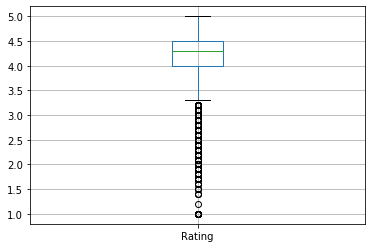

In [180]:
App_data.boxplot('Rating') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x16170F70>,
      dtype=object)

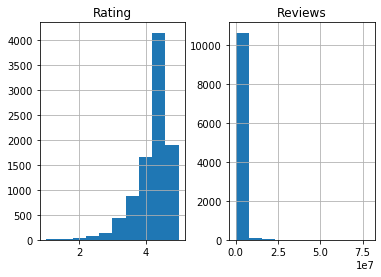

In [181]:
App_data.hist()

In [182]:
App_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10779 entries, 0 to 10778
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10779 non-null  object 
 1   Category        10779 non-null  object 
 2   Rating          9313 non-null   float64
 3   Reviews         10779 non-null  int64  
 4   Size            10779 non-null  object 
 5   Installs        10779 non-null  object 
 6   Type            10778 non-null  object 
 7   Price           10779 non-null  object 
 8   Content Rating  10779 non-null  object 
 9   Genres          10779 non-null  object 
 10  Last Updated    10779 non-null  object 
 11  Current Ver     10771 non-null  object 
 12  Android Ver     10777 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 631.6+ KB


# Data Cleaning

In [185]:
App_data.isnull().sum() # sum of missing Values 

App                  0
Category             0
Rating            1466
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [86]:
# Data Imputation and Manipulation

In [186]:
def impute_median(series):
    return series.fillna(series.median())

In [187]:
App_data.Rating =App_data['Rating'].transform(impute_median)

In [188]:
App_data.isnull().sum() # check the missing value 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [130]:
#mode  of categorical values
print(App_data['Type'].mode())
print(App_data['Current Ver'].mode())
print(App_data['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [102]:
#Fill the missing categogical values with mode
App_data['Type'].fillna(str(App_data['Type'].mode().values[0]),inplace=True)
App_data['Current Ver'].fillna(str(App_data['Current Ver'].mode().values[0]),inplace=True)
App_data['Android Ver'].fillna(str(App_data['Android Ver'].mode().values[0]),inplace=True)

In [103]:
App_data.isnull().sum()#Check the missing value


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [109]:
#Now we have to convert Price ,review , and Rating into Numerical Values
App_data['Price']=App_data['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
App_data['Price']= App_data['Price'].apply(lambda x:float(x))
App_data['Size']=App_data['Size'].apply(lambda x:str(x).replace('M','') if 'M' in str(x) else str(x))


In [114]:
App_data['Installs']=App_data['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
App_data['Installs']=App_data['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
App_data['installs']=App_data['Installs'].apply(lambda x: float(x))


In [115]:
App_data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,10000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,500000.0
2,"U Launcher Lite 鈥?FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,5000000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,50000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,100000.0


In [116]:
App_data.describe()

,Rating,Reviews,Price,installs
count,10779.000000,1.077900e+04,10779.000000,1.077900e+04
mean,4.206336,4.456577e+05,1.031288,1.552718e+07
std,0.480760,2.934946e+06,15.994523,8.525896e+07
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4.100000,3.750000e+01,0.000000,1.000000e+03
50%,4.300000,2.087000e+03,0.000000,1.000000e+05
75%,4.500000,5.478300e+04,0.000000,5.000000e+06
max,5.000000,7.815831e+07,400.000000,1.000000e+09


In [117]:
## Data visulatization

In [118]:
grp=App_data.groupby('Category')
x= grp['Rating'].agg(np.mean)# what is the avreage rating of this  category
y= grp['Price'].agg(np.sum) # how much money that category  made 
z=grp['Reviews'].agg(np.mean) #what is the avreage Reviews of this  category
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.181264
COMICS                 4.160345
COMMUNICATION          4.180311
DATING                 4.023276
EDUCATION              4.388462
ENTERTAINMENT          4.122973
EVENTS                 4.395313
FAMILY                 4.204455
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286608
HEALTH_AND_FITNESS     4.280531
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.202381
LIFESTYLE              4.131217
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.163571
PARENTING              4.320339
PERSONALIZATION        4.327907
PHOTOGRAPHY            4.196407
PRODUCTIVITY           4.226651
SHOPPING               4.262934
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.079067
TRAVEL_AND_LOCAL       4.134630

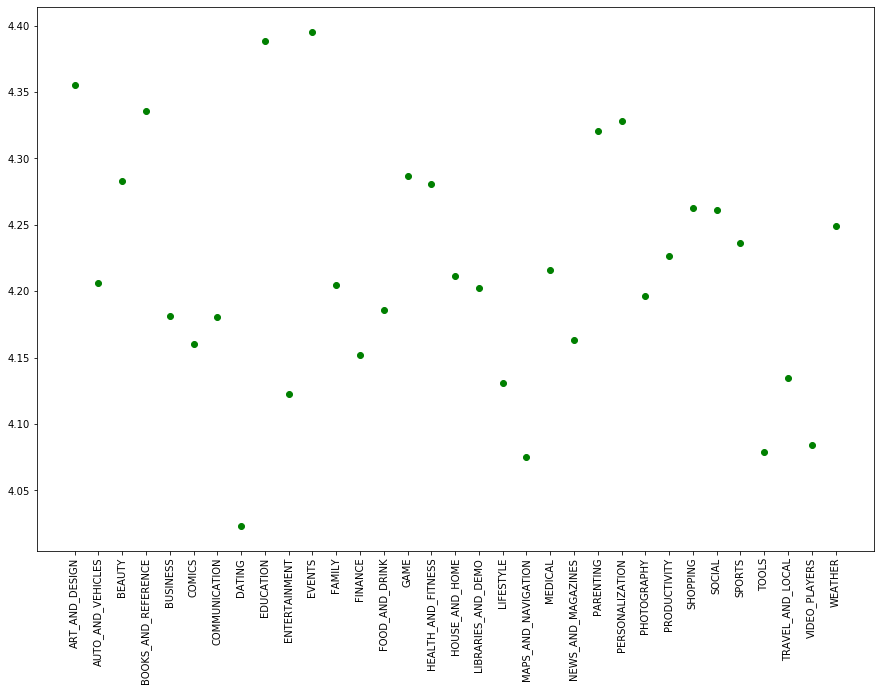

In [146]:
plt.figure(figsize=(15,10))
plt.plot(x, 'ro',color='g')
plt.xticks(rotation=90)
plt.show()

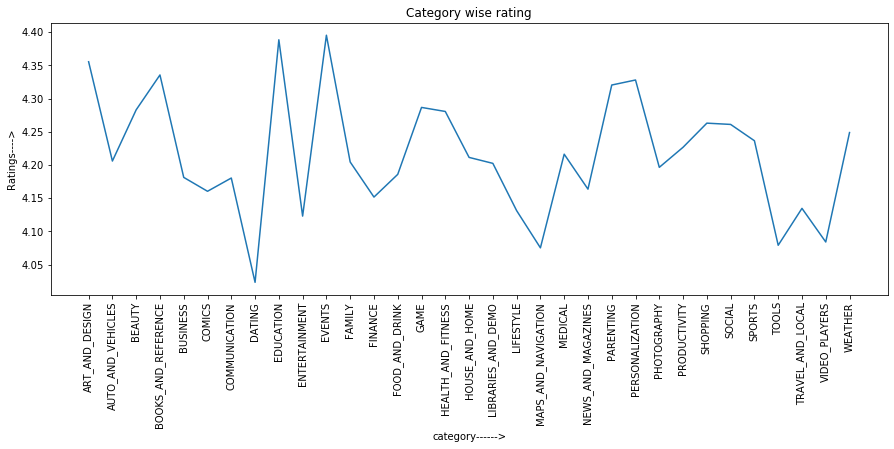

In [141]:
# Data visualziation with title
plt.figure(figsize=(15,5))
plt.plot(x)
plt.xticks(rotation=90)
plt.title('Category wise rating')
plt.xlabel('category------>')
plt.ylabel('Ratings---->')
plt.show()

# category wise pricing

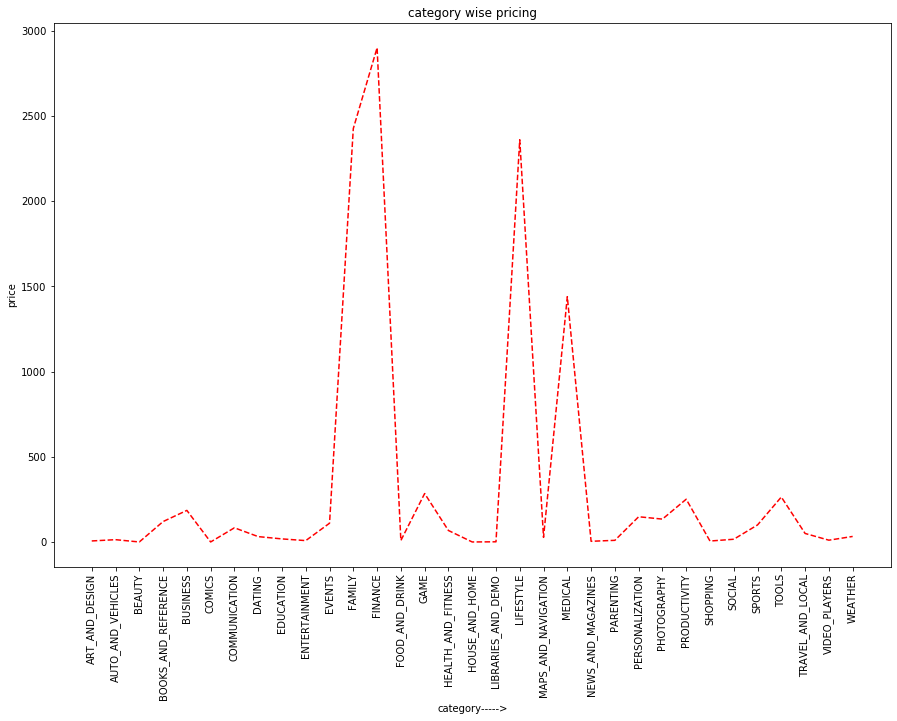

In [151]:
plt.figure(figsize=(15,10))
plt.plot(y ,'r--', color='r')
plt.xticks(rotation=90)
plt.title('category wise pricing')
plt.xlabel('category----->')
plt.ylabel('price')
plt.show()

# category wise review

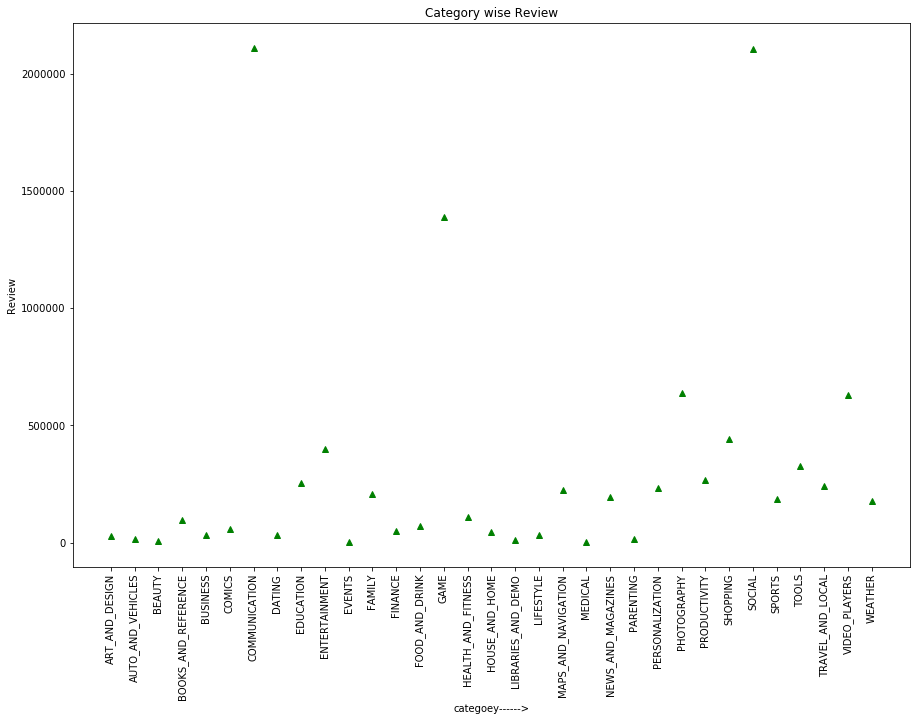

In [172]:
plt.figure(figsize=(15,10))
plt.plot(z, 'g^', color='g')
plt.xticks(rotation=90)

plt.title('Category wise Review')
plt.xlabel('categoey------>')
plt.ylabel('Review')
plt.show()